## Observations and Insights 

In [752]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_data = pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [742]:
# Checking the number of mice.
print(f"Number of mice are {len(complete_data['Mouse ID'].unique())}")

Number of mice are 249


In [743]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = complete_data[complete_data.duplicated(["Mouse ID","Timepoint"])]

duplicate_mouse_IDs = duplicate_mouse_df["Mouse ID"].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [750]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_detail_df = complete_data.loc[complete_data["Mouse ID"].isin(duplicate_mouse_IDs)]
duplicate_mouse_detail_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [756]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_data_df = complete_data[~complete_data["Mouse ID"].isin(duplicate_mouse_IDs)]
# complete_data.drop_duplicates(subset=["Mouse ID","Timepoint"])
final_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [757]:
# Checking the number of mice in the clean DataFrame.
print(f"Now Number of mice are {len(final_data_df['Mouse ID'].unique())}")

Now Number of mice are 248


## Summary Statistics

In [686]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

group_by_drug_regimen_df = final_data_df.groupby(["Drug Regimen","Timepoint"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_summary_df = pd.DataFrame({
    "mean":group_by_drug_regimen_df["Tumor Volume (mm3)"].mean(),
    "median":group_by_drug_regimen_df["Tumor Volume (mm3)"].median(),
    "var":group_by_drug_regimen_df["Tumor Volume (mm3)"].var(),
    "std":group_by_drug_regimen_df["Tumor Volume (mm3)"].std(),
    "sem":group_by_drug_regimen_df["Tumor Volume (mm3)"].sem()
})
drug_regimen_summary_df = drug_regimen_summary_df.reset_index()
drug_regimen_summary_df


,Drug Regimen,Timepoint,mean,median,var,std,sem
0,Capomulin,0,45.000000,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,45.597064,5.030889,2.242964,0.448593
2,Capomulin,10,43.084291,43.421014,12.344133,3.513422,0.702684
3,Capomulin,15,42.064317,42.798160,16.878693,4.108369,0.838617
4,Capomulin,20,40.716325,40.716428,19.035028,4.362915,0.909731
...,...,...,...,...,...,...,...
95,Zoniferol,25,55.432935,55.676604,5.808348,2.410052,0.602513
96,Zoniferol,30,57.713531,57.419744,9.601024,3.098552,0.800043
97,Zoniferol,35,60.089372,60.365832,10.876760,3.297993,0.881426
98,Zoniferol,40,62.916692,62.274543,13.958456,3.736102,0.998515


In [759]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

final_data_df.groupby(["Drug Regimen","Timepoint"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).reset_index()


,Drug Regimen,Timepoint,mean,median,var,std,sem
0,Capomulin,0,45.000000,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,45.597064,5.030889,2.242964,0.448593
2,Capomulin,10,43.084291,43.421014,12.344133,3.513422,0.702684
3,Capomulin,15,42.064317,42.798160,16.878693,4.108369,0.838617
4,Capomulin,20,40.716325,40.716428,19.035028,4.362915,0.909731
...,...,...,...,...,...,...,...
95,Zoniferol,25,55.432935,55.676604,5.808348,2.410052,0.602513
96,Zoniferol,30,57.713531,57.419744,9.601024,3.098552,0.800043
97,Zoniferol,35,60.089372,60.365832,10.876760,3.297993,0.881426
98,Zoniferol,40,62.916692,62.274543,13.958456,3.736102,0.998515


## Bar and Pie Charts

<IPython.core.display.Javascript object>


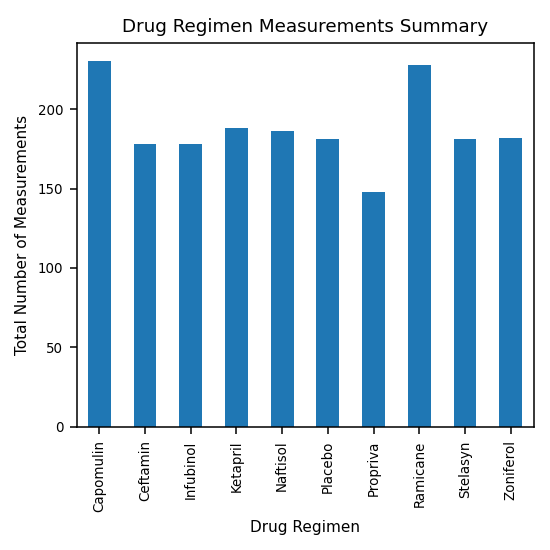

In [207]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook

drug_regimen_df = group_by_drug_regimen_df["Mouse ID"].count()

ax = drug_regimen_df.plot(kind="bar", title="Drug Regimen Measurements Summary",figsize=(4,4),fontsize=7)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Total Number of Measurements")
plt.tight_layout()

<IPython.core.display.Javascript object>


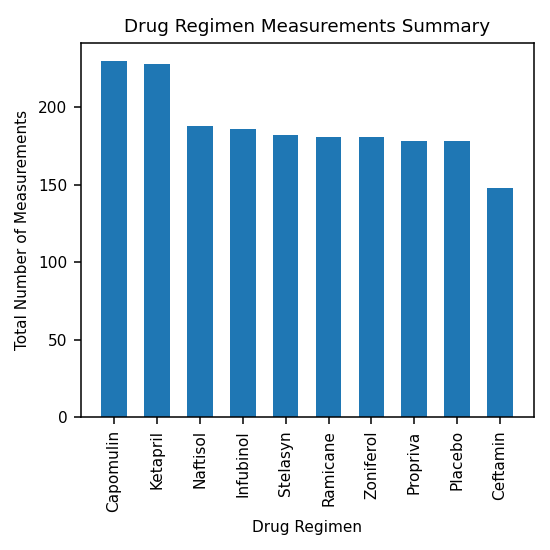

In [209]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

%matplotlib notebook

plt.figure(figsize=(4,4))
plt.bar(final_data_df["Drug Regimen"].unique(),final_data_df["Drug Regimen"].value_counts(), align="center", width=0.6)
plt.xticks(rotation=90)
plt.rc('font', size=8) 

plt.title("Drug Regimen Measurements Summary")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()

In [ ]:

# drug_regimen_df.plot.bar(figsize=(7,6),fontsize=7)
# plt.tight_layout()

# plt.title("Drug Regimen Measurements Summary")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Number of Measurements")
# df = pd.DataFrame(drug_regimen_df)

# df = pd.DataFrame(final_data_df["Drug Regimen"].value_counts())
 
# plt.bar(final_data_df["Drug Regimen"].unique(),df)
# x_axis = np.arange(len(group_by_drug_regimen_df))
# plt.bar(x_axis,group_by_drug_regimen_df["Mouse ID"].count())
# plt.show()

# x_axis = np.arange(len(rain_df))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, group_by_drug_regimen_df["Drug Regimen"], rotation="vertical")
# print(tick_locations)
# plt.xticks(tick_locations, group_by_drug_regimen_df["Drug Regimen"])
# # plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

<IPython.core.display.Javascript object>


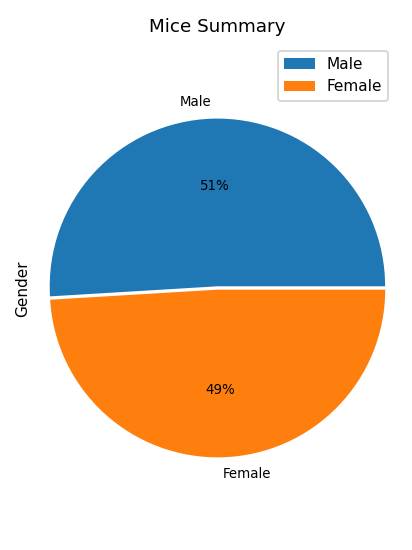

In [247]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

%matplotlib notebook

gender_distribution_df = final_data_df["Sex"].value_counts()
explode = (0, 0.02)
ax = gender_distribution_df.plot(kind="pie", explode=explode, title="Mice Summary",figsize=(3,4),fontsize=7,autopct='%1.0f%%')
ax.set_ylabel("Gender")
ax.axis('equal')
ax.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


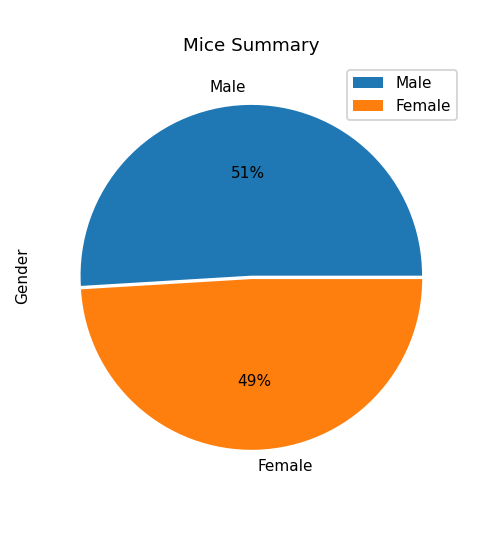

Index(['Male', 'Female'], dtype='object')

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
plt.figure(figsize=(3.5,4))
plt.rc('font', size=8) 
rating_labels = gender_distribution_df.index
plt.pie(gender_distribution_df, explode=explode,autopct="%1.0f%%", labels=rating_labels)
plt.title("Mice Summary")
plt.ylabel("Gender")
plt.show()
plt.legend()
plt.tight_layout()
gender_distribution_df
gender_distribution_df
rating_labels

## Quartiles, Outliers and Boxplots

In [426]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

selected_df = final_data_df.loc[final_data_df["Drug Regimen"].isin(treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse
selected__groupby_df = final_data_df.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(selected__groupby_df,final_data_df,how="left", on=["Mouse ID","Timepoint"]) 
merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [737]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list
data_list = []

for treatment in treatment_list:
    
    # Create empty list to fill with tumor vol data (for plotting)
    tumor_vol=[]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merge_df.loc[merge_df["Drug Regimen"] == treatment]
    
    tumor_vol = treatment_df["Tumor Volume (mm3)"]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    
    # add subset
    
    data_list.append(tumor_vol)
   
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

#     outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

<IPython.core.display.Javascript object>


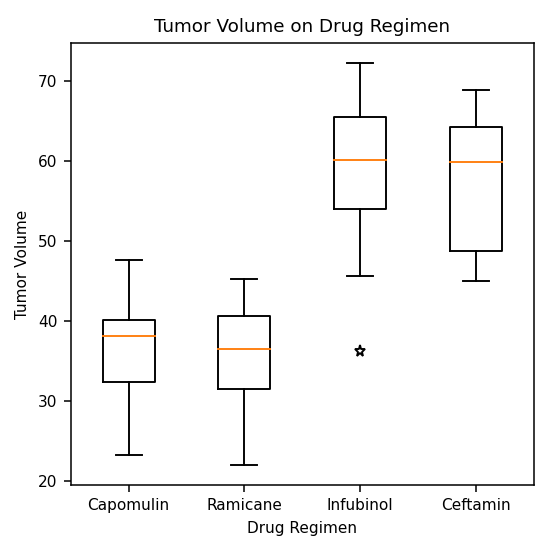

In [740]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(4,4))
# fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, sharex=True)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.set_title("Tumor Volume on Drug Regimen")
ax1.boxplot(data_list, labels=treatment_list, sym='*')
plt.show()
plt.tight_layout()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


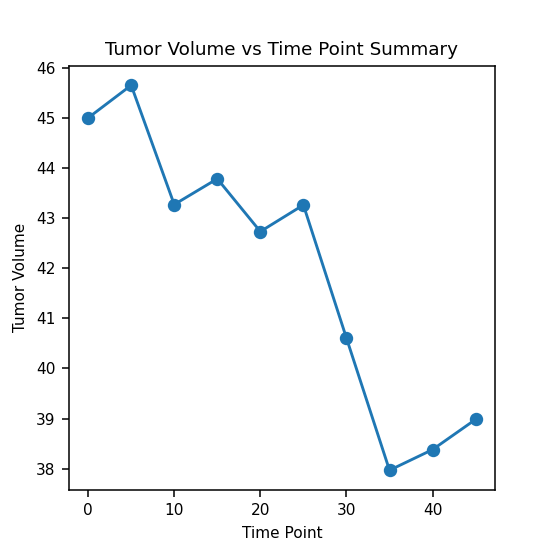

Text(0.5, 1.0, 'Tumor Volume vs Time Point Summary')

In [719]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib notebook

capomulin__mouse_df = final_data_df.loc[(final_data_df["Drug Regimen"] == "Capomulin") & (final_data_df["Mouse ID"] == 'b128')]
plt.figure(figsize=(4,4))
handle, = plt.plot(capomulin__mouse_df["Timepoint"],capomulin__mouse_df["Tumor Volume (mm3)"], marker='o')

plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs Time Point Summary")

<IPython.core.display.Javascript object>


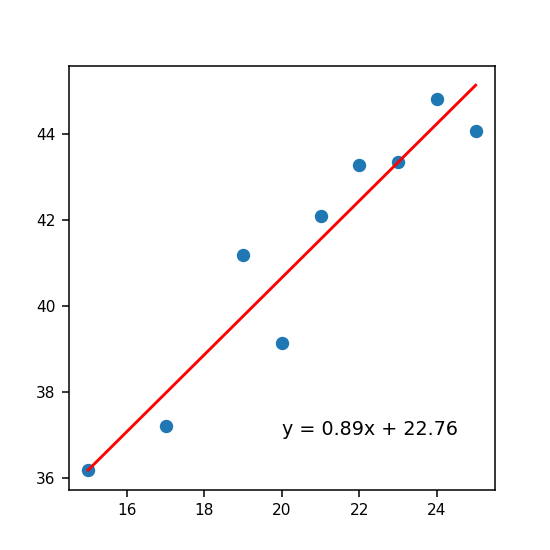

In [733]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook

capomulin_df = final_data_df.loc[(final_data_df["Drug Regimen"] == "Capomulin")]

capomulin_summary_df = capomulin_df.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]
plt.figure(figsize=(4,4))
plt.scatter(capomulin_summary_df.index.values, capomulin_summary_df.values)


## Correlation and Regression

In [734]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(capomulin_summary_df.index.values,capomulin_summary_df.values)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_summary_df.index.values,capomulin_summary_df.values)
regress_values = capomulin_summary_df.index.values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(capomulin_summary_df.index.values,regress_values,"r-")
plt.annotate(line_eq,xy=(20,37),fontsize=10,color="black")
plt.show()

The correlation coefficient between mouse weight and average tumor volume is 0.95
